<a href="https://colab.research.google.com/github/sofiafopi/Topicos/blob/main/Bono1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [17]:
from google.colab import files # Cargamos la base de datos en Google Colab, previamente descargada
uploaded = files.upload()

Saving asriosgu_nac2020.csv to asriosgu_nac2020 (1).csv


In [20]:
io_csv = io.BytesIO(uploaded['asriosgu_nac2020 (1).csv'])
tabla = pd.read_csv(io_csv, sep = ",", index_col=0, encoding='latin-1')
tabla.head(4)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,AREA_RES,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
44,560,3,2,NaN,2,9,9,2020,11,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,2,9,9,2020,4,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5


In [21]:
tabla1 = tabla[["EDAD_MADRE", "T_GES", "TALLA_NAC"]]
tabla1.head(4)

,EDAD_MADRE,T_GES,TALLA_NAC
COD_DPTO,,,
44,4,6,9
44,4,6,9
44,5,6,9
44,5,6,9


In [22]:
df2 = tabla1[(tabla1.EDAD_MADRE < 99) & (tabla1.T_GES != 9) & (tabla1.TALLA_NAC != 9)]
df2.head(4)

,EDAD_MADRE,T_GES,TALLA_NAC
COD_DPTO,,,
52,5,4,4
20,4,4,5
27,3,4,5
27,5,4,4


In [23]:
df2.EDAD_MADRE = df2.EDAD_MADRE.astype(str)
df2.EDAD_MADRE.head(2)

<ipython-input-23-11db5f8e5cb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.EDAD_MADRE = df2.EDAD_MADRE.astype(str)


COD_DPTO
52    5
20    4
Name: EDAD_MADRE, dtype: object

In [24]:
df2.loc[(df2.EDAD_MADRE == "1"), "EDAD_MADRE"], df2.loc[(df2.EDAD_MADRE == "2"), "EDAD_MADRE"], df2.loc[(df2.EDAD_MADRE == "3"), "EDAD_MADRE"], df2.loc[(df2.EDAD_MADRE == "4"), 'EDAD_MADRE'] = "10-14", "15-19", "20-24", "25-29"
df2.loc[(df2.EDAD_MADRE == "5"), 'EDAD_MADRE'], df2.loc[(df2.EDAD_MADRE == "6"), 'EDAD_MADRE'], df2.loc[(df2.EDAD_MADRE == "7"), 'EDAD_MADRE'], df2.loc[(df2.EDAD_MADRE == "8"), 'EDAD_MADRE'] = "30-34", "35-39", "40-44", "45-49"
df2.loc[(df2.EDAD_MADRE == "9"), 'EDAD_MADRE'], df2.loc[(df2.EDAD_MADRE == "99"), 'EDAD_MADRE'] = "50-55", "NA"
df2.head(5)

,EDAD_MADRE,T_GES,TALLA_NAC
COD_DPTO,,,
52,30-34,4,4
20,25-29,4,5
27,20-24,4,5
27,30-34,4,4
27,20-24,4,5


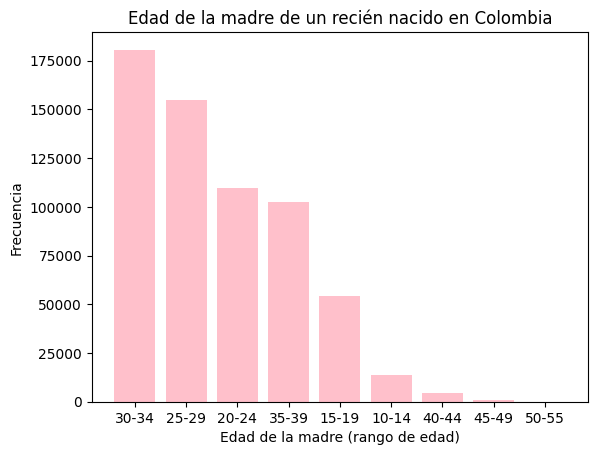

In [25]:
x_values = df2.EDAD_MADRE.unique()
y_values = df2.EDAD_MADRE.value_counts().tolist()
plt.bar(x_values, y_values, color = "pink")
plt.title('Edad de la madre de un recién nacido en Colombia')
ax = plt.subplot()  # Axis
ax.set_xlabel('Edad de la madre (rango de edad)')
ax.set_ylabel('Frecuencia')
plt.show()


El valor de 30 a 34 años es el rango de edad donde se tienen alrededor de 175000 madres de recién nacidos en Colombia, y es donde se tienen más madres. En rango de edad de 15 a 19 años se tienen aproximadamente 50000 madres de recién nacidos en Colombia. Los rangos de edades de 10 a 14 años, de 40 a 44 años, de 45 a 49 años y de 50 a 55 años tienen menos de 25000 madres de recién nacidos en Colombia.

In [26]:
sizes = np.array(y_values)
sizes

array([180645, 154653, 109560, 102244,  54439,  13967,   4231,    946,
          113])

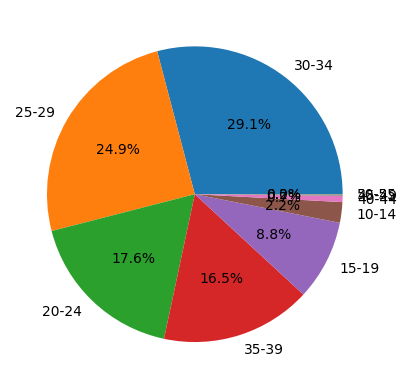

In [27]:
plt.pie(y_values, labels = x_values, autopct='%1.1f%%')
plt.show()

In [28]:
len(df2.EDAD_MADRE)

620798

In [29]:
porcentaje = [(x/len(df2.EDAD_MADRE)*100) for x in y_values]
print(x_values)
print(porcentaje)

['30-34' '25-29' '20-24' '35-39' '15-19' '10-14' '40-44' '45-49' '50-55']
[29.09883730295523, 24.91196814422727, 17.648252732772978, 16.46976955466996, 8.769197065712197, 2.249846165741513, 0.6815421441435057, 0.15238451154803978, 0.018202378229311308]


Aproximadamente el 29.09% de las madres de recién nacidos en Colombia tiene entre 30 y 34 años, el 24.91% entre 25 y 29 años, el 17.64% entre 20 y 24 años, el 16.46% entre 35 y 39 años, el 8.77% entre 15 y 19 años, el 2.24% entre 10 y 14 años, el 0.68% entre 40 y 44 años, el 0.15% entre 45 y 49 años, y el 0.018% entre 50 y 55 años

In [32]:
df2.loc[(df2.T_GES == 1), "T_GES"], df2.loc[(df2.T_GES == 2), "T_GES"], df2.loc[(df2.T_GES == 3), "T_GES"], df2.loc[(df2.T_GES == 4), "T_GES"] = "<22", "22-27", "28-37", "38-41"
df2.loc[(df2.T_GES == 5), "T_GES"], df2.loc[(df2.T_GES == 6), "T_GES"] = ">41", "Ignorado"
df2.loc[(df2.TALLA_NAC == 1), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == 2), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == 3), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == 4), "TALLA_NAC"] = "<20", "20-29", "30-39", "40-49"
df2.loc[(df2.TALLA_NAC == 5), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == 6), "TALLA_NAC"] = "50-59", "60>"
df2.T_GES, df2.TALLA_NAC = df2.T_GES.astype(str), df2.TALLA_NAC.astype(str)
df2.head(3)

<ipython-input-32-5e5ba2ced71d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.T_GES, df2.TALLA_NAC = df2.T_GES.astype(str), df2.TALLA_NAC.astype(str)


,EDAD_MADRE,T_GES,TALLA_NAC
COD_DPTO,,,
52,30-34,38-41,40-49
20,25-29,38-41,50-59
27,20-24,38-41,50-59


In [33]:
tabla_cont = pd.crosstab(df2.T_GES, df2["TALLA_NAC"])
tabla_cont

TALLA_NAC,20-29,30-39,40-49,50-59,60>,<20
T_GES,,,,,,
22-27,260,1872,102,0,0,2
28-37,53,3619,89212,37592,8,0
38-41,75,198,162539,322513,101,0
<22,22,6,0,0,0,0
>41,0,0,256,902,5,0
Ignorado,67,21,953,419,1,0


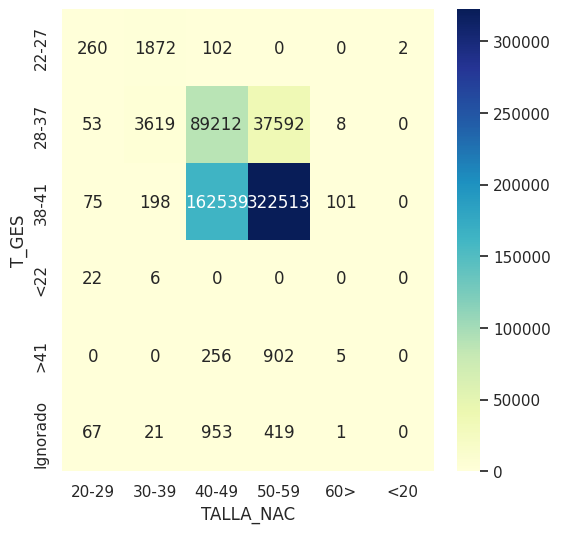

In [34]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(tabla_cont,  annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.show()

In [36]:
res = stats.chi2_contingency(tabla_cont)
chi, valor_p, _, _ = res
print(f"El valor de la estadística Chi cuadrado es {chi} y el valor p es de {valor_p}")

El valor de la estadística Chi cuadrado es 300045.3297185701 y el valor p es de 0.0


Como el **valor p** es menor a **0.05** entonces, no se rechaza con una confianza del 95% que el tiempo de gestación y la talla estén asociadas para los individuos recién nacidos en Colombia.

In [37]:
import math
coeficiente_contingencia = math.sqrt(chi/(chi + len(df2.TALLA_NAC)))
coeficiente_phi = math.sqrt(chi/len(df2.TALLA_NAC))
coeficiente_v_cramer = math.sqrt(chi/(len(df2.TALLA_NAC)*min(4-1, 2-1)))
print(f"Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por {coeficiente_contingencia}, {coeficiente_phi} y {coeficiente_v_cramer}")


Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por 0.5708218152971455, 0.6952136347963199 y 0.6952136347963199


De acuerdo con el artículo Landis, J. R., & Koch, G. G. (1977). The measurement of observer agreement for categorical data. biometrics, 159-174, se tiene que el tiempo de gestacion y la talla están sustancialmente asociados.
